# Introduction to Time Series

This class is based on:
<!--- [Avishek Pal, PKS Prakash (2017). Practical time series analysis: master time series data processing[...]](https://universidadefe957-my.sharepoint.com/:b:/g/personal/paulo_firmino_ufca_edx_br/EY6upDI8ktJKnCQlqns9kz4BhFko1dcOehhwcyw7JE4JuQ?e=WMhXbd),-->
- [Hyndman (2008). Forecasting with Exponential Smoothing](https://1drv.ms/b/s!Ajft4xxB-ttTks5tD5YXlyNJZXuVnQ?e=1QIvKc). 

<!--The codes can be found [here](https://github.com/PacktPublishing/Practical-Time-Series-Analysis/tree/master/.)-->

# 1. Exponential Smoothing Conpepts

There are a variety of methods that fall into
the exponential smoothing family, each having the property that forecasts
are weighted combinations of past observations, with recent observations
given relatively more weight than older observations. The name “exponential smoothing” reflects the fact that the weights decrease exponentially as
the observations get older.
The idea seems to have originated with Robert G. Brown in about 1944
while he was working for the US Navy as an Operations Research analyst.

Holt’s method differed from Brown’s with respect to the smoothing of the trend and seasonal
components. 
Holt’s work on additive and multiplicative seasonal exponential smoothing became well known through a paper by his student Peter Winters (1960)
which provided empirical tests for Holt’s methods. As a result, the seasonal
versions of Holt’s methods are usually called Holt-Winters’ methods 

### State Space Models

Let $x_t$ denote the observation at time $t$, and let $z_t$ be a “state vector”
containing unobserved components that describe the level, trend and seasonality of the series.  Then a linear innovations state space model can be
written as

$x_t = w^Tz_{t−1} + e_t $                     (1.1a),

$z_t = F z_{t−1} + g e_t$                     (1.1b), 


in which $\{e_t\}$ is a white noise series and $F, g$ and $w$ are coefficients. Equation (1.1a) is known as the measurement (or observation) equation; it describes the relationship between the unobserved states $z_{t−1}$ and the observation $x_t$.
Equation (1.1b) is known as the transition (or state) equation; it describes the
evolution of the states over time. 

Nonlinear state space models are also possible. One form that we use in
Chap. 2 is

$x_t = w(z_{t−1}) + r(z_{t−1}) e_t$  (1.2a)

$z_t = f(z_{t−1}) + g(z_{t−1}) e_t$ (1.2b) 

### Time Series Decomposition

It is common in business and economics to think of a time series as a combination of various components such as the trend ($T$), cycle ($C$), seasonal ($S$),
and irregular or error ($E$) components. These can be defined as follows:

Trend ($T$): The long-term direction of the series

Seasonal ($S$): A pattern that repeats with a known periodicity
(e.g., 12 months per year, or 7 days per week)

Cycle ($C$): A pattern that repeats with some regularity but
with unknown and changing periodicity (e.g., a
business cycle)

Irregular or error ($E$): The unpredictable component of the series.

A purely additive model can be expressed as
$$x_t = T_t + S_t +e_t$$

A purely multiplicative model is written as
$$x_t = T_t \times S_t \times e_t$$

Other combinations, apart from simple addition and multiplication, are
also possible. For example,
$$x_t = (T_t + S_t)\times e_t$$

### Classification of Exponential Smoothing Methods

In exponential smoothing, we always start with the trend component, which
is itself a combination of a level term ($l$) and a growth term ($b$). The level
and growth can be combined in a number of ways, giving five future trend
types. Let $T_h$ denote the forecast trend over the next $h$ time periods, and let
$\phi$ denote a damping parameter ($0 < \phi < 1$). Then the five trend types or
growth patterns are as follows:

None: $T_h = l$

Additive: $T_h = l + bh$

Additive damped: $T_h = l + (\phi + \phi^2 + \dots + \phi^h)b$

Multiplicative: $T_h = lb^h$

Multiplicative damped: $T_h = lb^{(\phi + \phi^2 + \dots + \phi^h)}$

Only involving trend and seasonal components, one has 15 architectures:
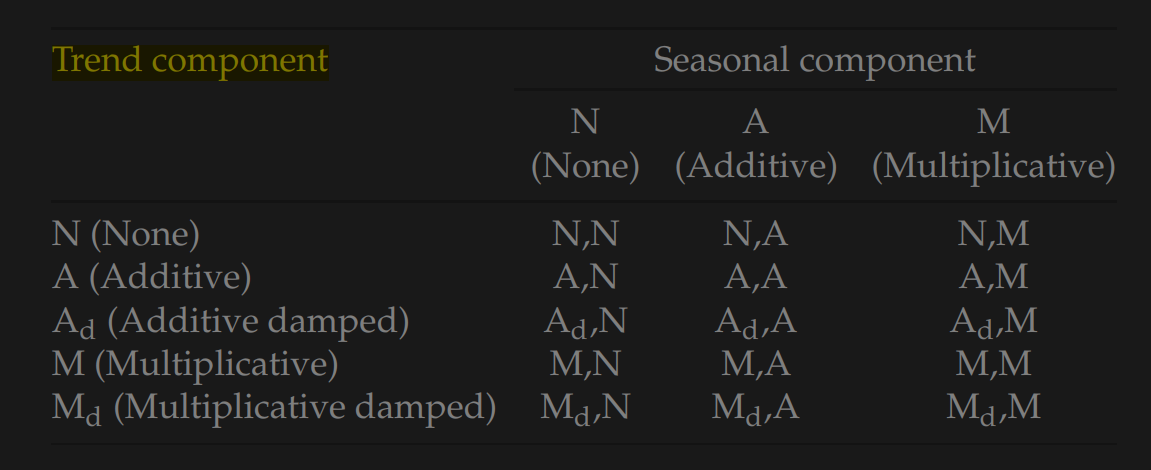

### Simple Exponential Smoothing (N,N Method)

Suppose we have observed data up to and including time $t − 1$, and we wish
to forecast the next value of our time series, $x_t$. Our forecast is denoted by $\hat{x}_t$.
When the observation $x_t$ becomes available, the forecast error is instantiated to be
$e_t = x_t − \hat{x}_t$. The method of simple exponential smoothing, due to Brown’s work
in the mid-1950s and published in Brown (1959), takes the forecast for the
previous period and adjusts it using the forecast residual. That is, the forecast
for the next period is

$\hat{x}_{t+1} =
 \hat{x}_t + \alpha e_t = 
 \hat{x}_t + \alpha (x_t − \hat{x}_t)$, (2.1) 

in which $\alpha \in (0, 1)$.

Another way of writing (2.1) is
$\hat{x}_{t+1} = \alpha x_t + (1 − \alpha)\hat{x}_t$. (2.2)

The implications of exponential smoothing can be seen more easily if (2.2)
is expanded by replacing $\hat{x}_t$ with its components, as follows:
$$\hat{x}_{t+1} = 
\alpha x_t + (1 − \alpha)[\alpha x_{t−1} + (1 − \alpha)\hat{x}_{t−1}] = \\
\alpha x_t + \alpha(1 − \alpha)x_{t−1} + (1 − \alpha)^2\hat{x}_{t−1}.$$

If this substitution process is repeated by replacing $\hat{x}_{t−1}$ with its components and so on the result is
$\hat{x}_{t+1} = \alpha x_t + \\
\alpha(1 − \alpha)x_{t−1} + \\
\alpha(1 − \alpha)^2x_{t−2} + \\
\alpha(1 − \alpha)^3x_{t−3} +\\
\alpha(1 − \alpha)^4x_{t−4} + \dots + \\
\alpha(1 − \alpha)^{t−1}x_1 + \\
(1 − \alpha)^t\hat{x}_1.$

So $\hat{x}_{t+1}$ represents a weighted moving average of all past observations with
the weights decreasing exponentially; hence the name “exponential smoothing.” 

### Holt’s Linear Method (A,N Method)

Holt (1957) extended simple exponential smoothing to linear exponential smoothing to allow forecasting of data with trends. The forecast for
Holt’s linear exponential smoothing method is found using two smoothing
constants, $\alpha$ and $\beta^*$ (with values between 0 and 1), and three equations:

$$ Level: l_t = \alpha x_t + (1 − \alpha)(l_{t−1} + b_{t−1}), (2.4a)$$
$$ Growth: b_t = \beta^*(l_t − l_{t−1}) + (1 − \beta^*)b_{t−1}, (2.4b) $$
$$ Forecast: \hat{x}_{t+h|t} = l_t + b_th. (2.4c) $$
Here $l_t$ denotes an estimate of the level of the series at time $t$ and $b_t$ denotes
an estimate of the slope (or growth) of the series at time $t$. Note that $b_t$ is a
weighted average of the previous growth $b_{t−1}$ and an estimate of growth
based on the difference between successive levels. 

One interesting special case of this method occurs when $\beta^* = 0$. Then
$$Level: l_t = \alpha x_t + (1 − \alpha)(l_{t−1} + b),$$
$$Forecast: \hat{x}_{t+h|t} = l_t + bh.$$

###  Damped Trend Method (Ad,A Method)

Gardner and McKenzie (1985) proposed a modification of Holt’s linear
method to allow the “damping” of trends. The equations for this method
are:
$$Level: l_t = \alpha x_t + (1 − \alpha)(l_{t−1} + \phi b_{t−1}), (2.5a)$$
$$Growth: b_t = \beta^*(l_t − l_{t−1}) + (1 − \beta^*)\phi b_{t−1}, (2.5b)$$
$$Forecast: \hat{x}_{t+h|t} = l_t + (\phi + \phi^2 + \dots + \phi^h)b_t. (2.5c)$$
Thus, the growth for the one-step forecast of $x_{t+1}$ is $\phi b_t$, and the growth is
dampened by a factor of $\phi$ for each additional future time period. If $\phi = 1$,
this method gives the same forecasts as Holt’s linear method. 

###  Holt-Winters’ Trend and Seasonality Method

#### Additive Seasonality (A,A Method)

$Level: l_t = \alpha(x_t − s_{t-m}) + (1 − \alpha)(l_{t-1} + b_{t−1}) (2.7a)\\
Growth: b_t = \beta^*(l_t − l_{t-1}) + (1 − \beta^*)b_{t−1} (2.7b)\\
Seasonal: s_t = \gamma(x_t − l_{t-1} − b_{t−1}) + (1 − \gamma)s_{t-m} (2.7c)\\
Forecast: \hat{x}_{t+h|t} = l_t + b_th + s_{t-m+h^+_m}. (2.7d)$

where $m$ is the length of seasonality (e.g., number of months or quarters
in a year), $l_t$ represents the level of the series, $b_t$ denotes the growth, $s_t$
is the seasonal component, $\hat{x}_{t+h|t}$ is the forecast for $h$ periods ahead, and
$h^+_m = [(h − 1)$ mod $m] + 1$. 
The number $A$ mod $B$ is the remainder when $A$ is divided by $B$. Ex. : 7 mod 3 = 1.

The parameters $(\alpha, \beta, \gamma)$ are usually restricted to lie between 0 and 1. The reader should refer to Sect. 2.6.2 for more details on restricting the values of the parameters.

What is the meaning of $h^+_m$?? It seems to be the rest after seasonal lag $(t-m)$ when computing $s_{...}$. 

Ex: 
$\\m = 12$, $h= 3$, $h^+_m = (2$ mod $12) + 1 = 1 \\$
$m = 12$, $h= 15$, $h^+_m = (15$ mod $12) + 1 = 3 + 1 = 4$


## State Space Models

the model ETS(A,A,N)
has additive errors, additive trend and no seasonality—in other words, this
is Holt’s linear method with additive errors. Similarly, ETS(M,Md,M) refers
to a model with multiplicative errors, a damped multiplicative trend and
multiplicative seasonality. The notation ETS(·,·,·) helps in remembering the
order in which the components are specified. ETS can also be considered an
abbreviation of *E*xponen*T*ial *S*moothing.

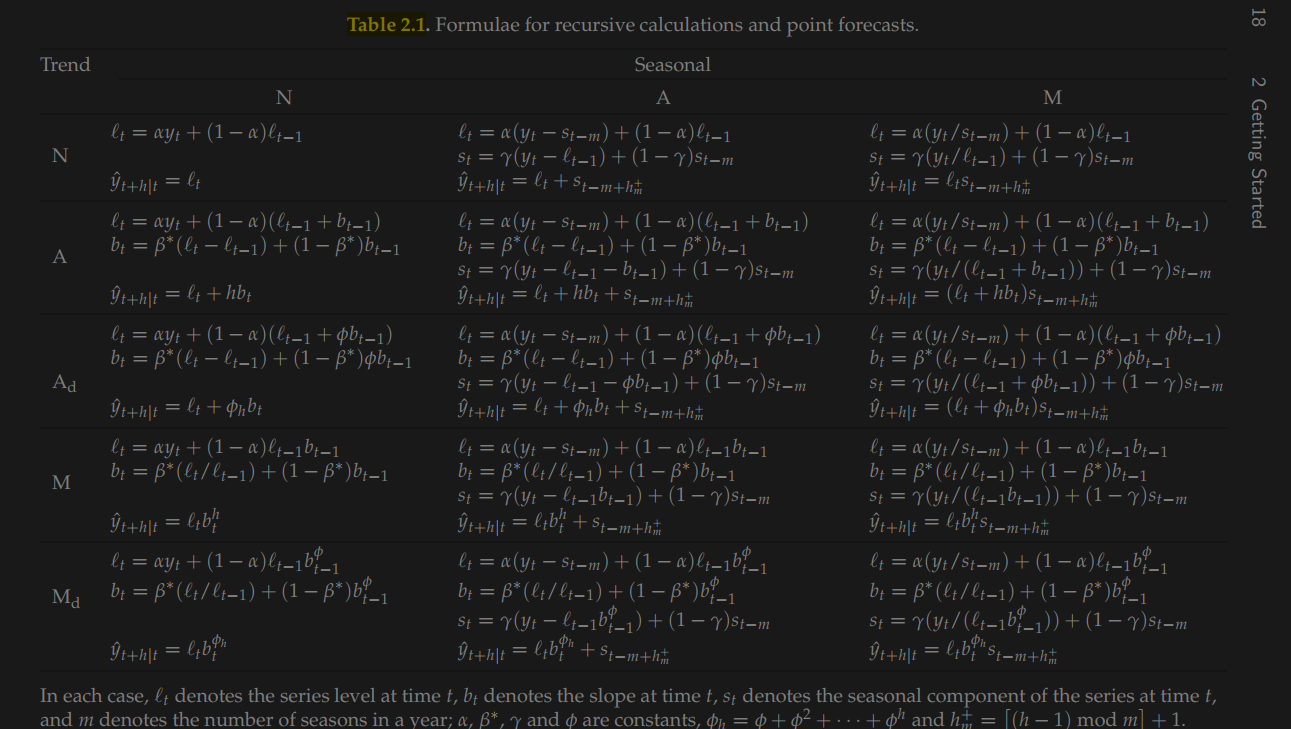

### State Space Models for Holt’s Linear Method

#### Additive Error Model: ETS(A,A,N)

parei

Let $\hat{x}_t = l_{t-1} + b_{t-1}$ denote the one-step forecast of $x_t$ assuming we
know the values of all parameters. Also, let $e_t = x_t − \hat{x}_t$ denote the one-step
forecast residual at time $t$. So, we find that
$$x_t = l_{t−1} + b_{t−1} + e_t, (2.8)$$
and using (2.4a) and (2.4b) we can write
$$l_t = l_{t−1} + b_{t−1} + \alpha e_t, (2.9) \\
b_t = b_{t−1} + \beta^*(l_t − l_{t−1} − b_{t−1}) = 
b_{t−1} + \alpha \beta^* e_t. (2.10)$$

We simplify the last expression by setting $\beta = \alpha \beta^*$. The three equations
above constitute a state space model underlying Holt’s method. We can write
it in standard state space notation by defining the state vector as 
$$z_t = (l_t, b_t)^T$$
and expressing (2.8)–(2.10) as
$$x_t = 
\begin{bmatrix}
1 & 1
\end{bmatrix} z_{t−1} + e_t, (2.11a) \\
z_t = 
\begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix} z_{t−1} + 
\begin{bmatrix}
\alpha & \beta \\
\end{bmatrix} e_t. (2.11b)$$

From (2.11a) one can see that 
$x_t = 
\begin{bmatrix}
1 & 1
\end{bmatrix} 
\begin{bmatrix}
l_{t-1} \\ 
b_{t-1}
\end{bmatrix} + e_t = $ 
$l_{t−1} + b_{t−1} + e_t$, i.e. Eq (2.8).

From (2.11b) one can see that 

$z_t = \begin{bmatrix}
l_{t} \\ 
b_{t}
\end{bmatrix} = 
\begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix} 
\begin{bmatrix}
l_{t-1} \\ 
b_{t-1}
\end{bmatrix} + 
\begin{bmatrix}
\alpha & \beta
\end{bmatrix} e_t = $ 
$\begin{bmatrix}
l_{t−1} + b_{t−1} + \alpha e_t \\
b_{t−1} + \beta e_t
\end{bmatrix}$, i.e. Eqs (2.9) and (2.10).

#### State Space Models for All Exponential Smoothing Methods

We now give the state space models for all 30 exponential smoothing
variations. The general model involves a state vector $z_t = (l_t, b_t, s_t, s_{t−1}, \dots, s_{t−m+1})^T$ and state space equations of the form

$$x_t = w(z_{t−1}) + r(z_{t−1})e_t, (2.12a)\\
z_t = f(z_{t−1}) + g(z_{t−1})e_t, (2.12b)$$
in which $\{e_t\}$ is a Gaussian white noise process instance with variance $\sigma^2$, and $\mu_t = w(z_{t−1})$. The model with additive errors has $r(z_{t−1}) = 1$, so that $$x_t = \mu_t + e_t.$$
The model with multiplicative errors has $r(z_{t−1}) = \mu_t$, so that 
$$x_t = \mu_t(1 + e_t).$$ 
Thus, $e_t = (x_t − \mu_t)/\mu_t$ is the relative residual for the multiplicative model.
The models are not unique. Clearly, any value of $r(z_{t−1})$ will lead to identical
point forecasts for $x_t$.
Each of the methods in Table 2.1 can be written in the form given in (2.12a)
and (2.12b). The underlying equations for the additive error models are given
in Table 2.2. We use $\beta = \alpha \beta^*$ to simplify the notation. Multiplicative error models are obtained by replacing $e_t$ with $\mu_t e_t$ in the equations of Table 2.2.
The resulting multiplicative error equations are given in Table 2.3.

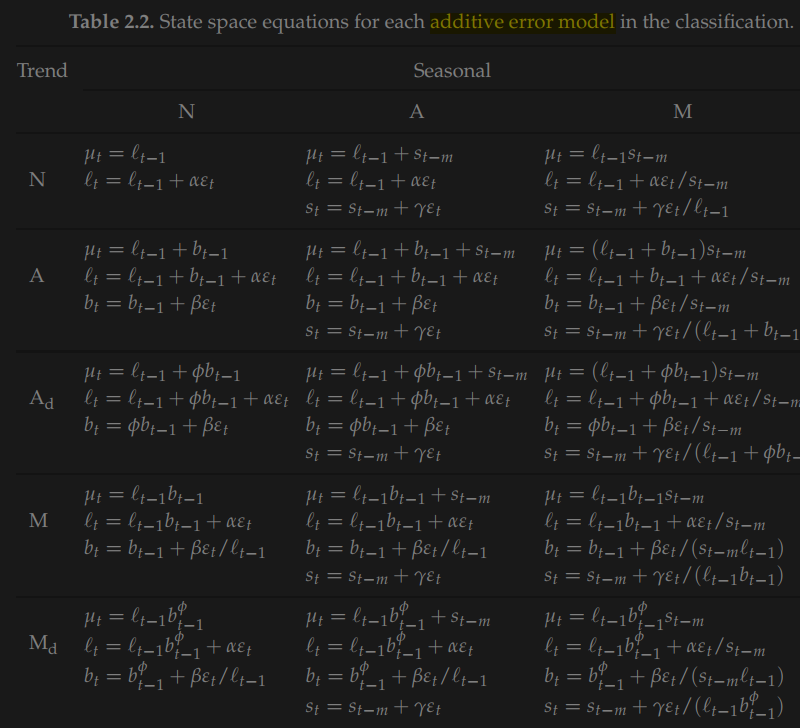

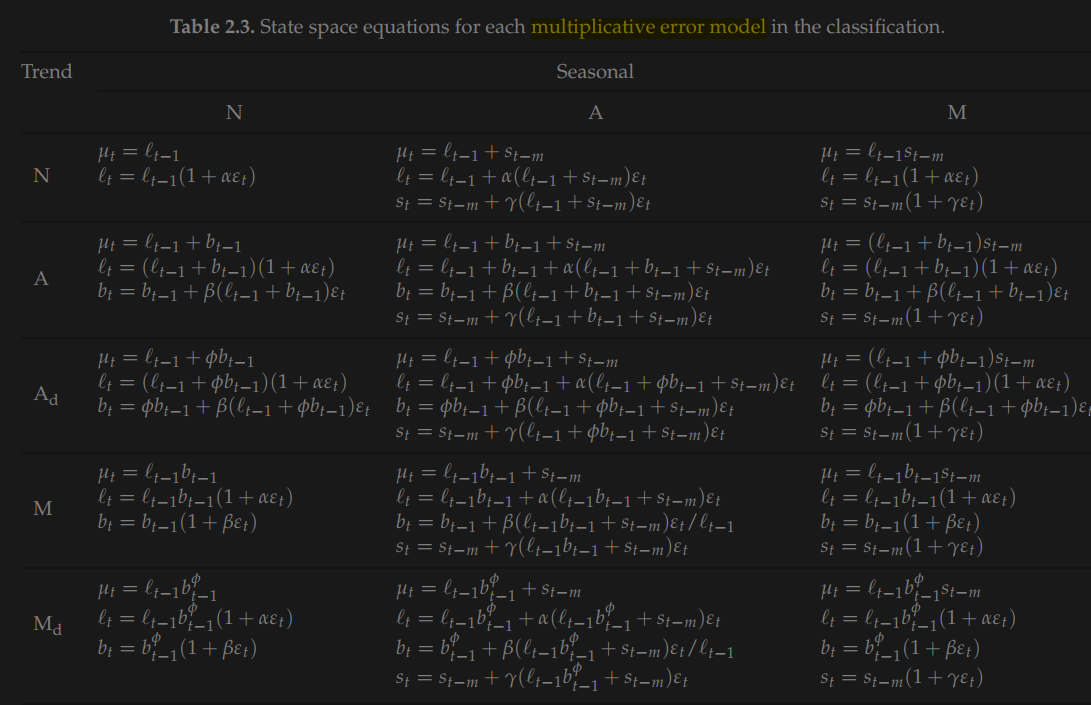

The multiplicative error models are useful when the data are strictly positive, but are not numerically stable when the data contain zeros or negative values. So when the time series is not strictly positive, only the six fully
additive models may be applied.

The point forecasts given earlier are easily obtained from these models
by iterating (2.12) for $t = n + 1, n + 2, \dots , n + h$, and setting $e_{n+j} = 0$ for
$j = 1, \dots , h$. 

Exercício de casa#2: 

a. For the ETS(A,Ad,N) model, write the measurement equation and transition equations with a separate equation for each of the two states (level
and growth).

b. For the ETS (A,Ad,N) model, write the measurement and transition equations in matrix form, defining $z_t, w(z_{t−1}), r(z_{t−1}), f(z_{t−1})$, and $g(z_{t−1})$.
See Sect. 2.5.1 for an example based on the ETS(A,A,N) model.

c. Repeat parts a and b for the ETS(A,A,A) model.

d. Repeat parts a and b for the ETS(M,Ad,N) model.

# 2.Real case: Down Jones

The Down Jones dataset for this exercise has been downloaded from [Yahoo! Finance](http://finance.yahoo.com).

In [1]:
#CONSIDERING MY CLASSES STRUCTURE
# %pip install yfinance
import sys
sys.path.insert(0,"..")
from Classes.Auxiliar import *
from Classes.Preprocessing import *
from Classes.Modeling import *
from __future__ import print_function#to enable using print as a function for readers who might be using a 2.x version of Px_thon
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Input/Output Process object

In [2]:
caseLabel = "^DJI"
iops = InputOutputProcess(root='C:/Users/praf6/OneDrive/UFCA/Ensino/CRAN R_aulas/kaggleFiles/',
                          dataFolderNm="data/",
                          resultsFolderNm="results/",
                          caseLabel=caseLabel,
                          isFromYFinance=False,#True
                          dataDelimiter = ',')
# iops.readData(phase='train', isToView=False)
iops.tv_data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,24809.349609,24864.189453,24741.699219,24824.009766,24824.009766,341130000
1,2018-01-03,24850.449219,24941.919922,24825.550781,24922.679688,24922.679688,456790000
2,2018-01-04,24964.859375,25105.960938,24963.269531,25075.130859,25075.130859,403280000
3,2018-01-05,25114.919922,25299.789062,25112.009766,25295.869141,25295.869141,358020000
4,2018-01-08,25308.400391,25311.990234,25235.410156,25283.000000,25283.000000,341390000


## Preprocessing

In [3]:
pp = Preprocessing(iops=iops,
                   targetsNms=['Close'],
                #    qtVarsNms=['Fare', 'Age', 'Parch', 'SibSp'], 
                #    targetsAreBinary = True,
                targetsAreNonNegative = True)
pp.tv_ts_split()

self.t_x.shape:  (1207, 6)
self.t_y.shape:  (1207, 1)
self.v_x.shape:  (302, 6)
self.v_y.shape:  (302, 1)
train start date: 2018-01-02
train end date: 2022-10-17


KeyError: 0

In [87]:
pp.transform_tv_y(isToLog=True, isToStandardize=True)
display(pp.t_t_y.head(3))
display(pp.t_v_y.head(3))

,Close
0,-1.028301
1,-0.999531
2,-0.955302


,Close
1207,0.470770
1208,0.446973
1209,0.425433


## Some initial study

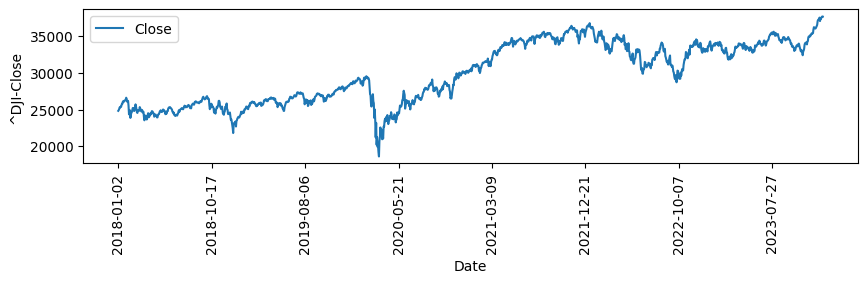

In [88]:
# train = pd.concat([], index=1)
figsize = (10,2)
# yLab = (ticker.replace('^', '')+'-Close')
iops.tv_data.plot(figsize=figsize, x = iops.dateColNm, y='Close', ylabel=(caseLabel+'-Close'), rot=90);

## ETS modeling


A good reference is the documentation of the [sktime](https://www.sktime.net/en/stable/api_reference/auto_generated/sktime.forecasting.ets.AutoETS.html) package.

significantLags: [1, 2, 3, 5, 7, 8, 9, 10, 11, 28, 29, 31]


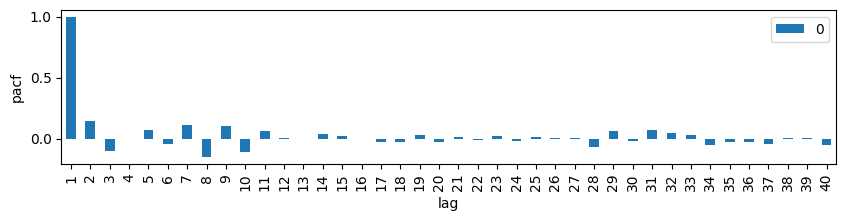

In [89]:
# %pip install sktime
# %pip install statsmodels
from sktime.forecasting.ets import AutoETS
# from sktime.utils.plotting import plot_series
# import statsmodels
import statsmodels.api as sm
def getSignificantLags(y, nLags = 5, alpha=0.05, isToPlot = False):
    pac, pac_ci = sm.tsa.pacf(x=y, nlags=nLags, alpha=alpha)
    if isToPlot:
        pd.DataFrame(pac)[1:].plot(kind='bar', figsize=figsize, legend='pacf',
                                xlabel='lag', ylabel='pacf');
    significantLags = []
    for i in range(1, len(pac)):
        # print(pac[i], pac_ci[i][0], pac_ci[i][1])
        if pac[i] < pac_ci[i][0] - pac[i] or pac[i] > pac_ci[i][1] - pac[i]:
            significantLags.append(i)
    print('significantLags:', significantLags)
    return significantLags
e1_significantLags = getSignificantLags(y=pp.t_y, nLags = 40, alpha=0.05, isToPlot=True)

In [90]:
modeling = Modeling(pp)
ets=modeling.get_saved_model(AutoETS(), label='ETS') 
if ets is None or True:
    ets = AutoETS(
        error='add', 
        trend='add', 
        damped_trend=False, 
        seasonal='add', 
        sp=29, 
        # initialization_method='estimated', 
        # initial_level=None, 
        # initial_trend=None, 
        # initial_seasonal=None, 
        # bounds=None, 
        # dates=None, 
        # freq=None, 
        # missing='none', 
        # start_params=None, 
        # maxiter=1000, 
        # full_output=True, 
        # disp=False, 
        # callback=None, 
        # return_params=False, 
        auto=False, #True, 
        # information_criterion='bic', 
        # allow_multiplicative_trend=True, 
        # restrict=True, 
        # additive_only=False, 
        # ignore_inf_ic=True, 
        n_jobs=-1, 
        random_state=1)
    
    ets.fit(pp.t_y)
    modeling.save_model(model=ets, label='ETS')
ets.summary()

>>>  AutoETS_ETS  saved!


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 ETS Results                                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1207
Model:                       ETS(AAA)   Log Likelihood               -8868.018
Date:                Fri, 13 Sep 2024   AIC                          17806.036
Time:                        16:18:44   BIC                          17984.393
Sample:                             0   HQIC                         17873.202
                               - 1207   Scale                       140988.882
Covariance Type:               approx                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
smoothing_level         0.8875      0.023     38.750      0.000       0.843       0.932
smoothing_trend         0.0002        nan        nan        nan         nan         nan
smoothing_seasonal      0.0469        nan        nan        nan         nan         nan
initial_level        2.555e+04    361.699     70.635      0.000    2.48e+04    2.63e+04
initial_trend          -7.7339        nan        nan        nan         nan         nan
initial_seasonal.0   -136.3887    104.245     -1.308      0.191    -340.706      67.928
initial_seasonal.1    -27.0956    108.833     -0.249      0.803    -240.405     186.214
initial_seasonal.2    126.1728    100.134      1.260      0.208     -70.086     322.431
initial_seasonal.3     82.6740    107.229      0.771      0.441    -127.491     292.839
initial_seasonal.4     63.2007    109.794      0.576      0.565    -151.992     278.393
initial_seasonal.5     46.7706    105.429      0.444      0.657    -159.866     253.407
initial_seasonal.6    130.6164    104.569      1.249      0.212     -74.336     335.569
initial_seasonal.7     94.9309    108.325      0.876      0.381    -117.383     307.245
initial_seasonal.8    224.4425    102.797      2.183      0.029      22.965     425.920
initial_seasonal.9    334.3277    103.359      3.235      0.001     131.747     536.908
initial_seasonal.10   103.8359     98.000      1.060      0.289     -88.241     295.913
initial_seasonal.11   126.2723    110.181      1.146      0.252     -89.678     342.223
initial_seasonal.12    69.6199    108.711      0.640      0.522    -143.449     282.689
initial_seasonal.13   261.5155    110.122      2.375      0.018      45.681     477.350
initial_seasonal.14   373.7364    109.059      3.427      0.001     159.984     587.489
initial_seasonal.15   442.1582    111.368      3.970      0.000     223.882     660.435
initial_seasonal.16   419.2924    104.835      4.000      0.000     213.819     624.766
initial_seasonal.17   595.0479     88.939      6.691      0.000     420.732     769.364
initial_seasonal.18   558.6785    108.930      5.129      0.000     345.179     772.178
initial_seasonal.19   324.4507     89.444      3.627      0.000     149.144     499.757
initial_seasonal.20   391.3811    110.122      3.554      0.000     175.546     607.216
initial_seasonal.21   523.7673     72.005      7.274      0.000     382.640     664.895
initial_seasonal.22   403.2473     98.370      4.099      0.000     210.446     596.048
initial_seasonal.23     3.1860     56.987      0.056      0.955    -108.506     114.878
initial_seasonal.24   170.4179    107.333      1.588      0.112     -39.951     380.787
initial_seasonal.25    97.6542    100.216      0.974      0.330     -98.765     294.073
initial_seasonal.26  -332.5323     66.473     -5.003      0.000    -462.817    -202.248
initial_seasonal.27  -280.2887     86.068     -3.257      0.001    -448.978    -111.599
initial_seasonal.28          0     74.285          0      1.000    -145.5

In [91]:
-np.arange(10)

array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9])

In [92]:
#predicting the validation data ('one-step ahead' - osa -
# and 'far from one-step ahead' - ffosa)
forecasts_inSample = pd.Series(ets.predict(fh=-np.arange(len(pp.t_y))).iloc[:,0])#pp.t_y['Close']
forecasts_outSample_ffosa = pd.Series(ets.predict(fh=np.arange(1, len(pp.v_y))).iloc[:,0])
forecasts_outSample_osa_on = pd.Series(index = pp.v_y.index)
forecasts_outSample_osa_off = pd.Series(index = pp.v_y.index)
ets_on = ets
ets_off = modeling.get_saved_model(ets, label='ETS') 
for t in range(len(pp.v_y)):
    index = pp.v_y.index[t]
    pred_osa_off = ets_off.predict(fh=1).iloc[0,0]
    # pred_osa_on = ets_on.predict(fh=1).iloc[0,0]
    forecasts_outSample_osa_off[index] = pred_osa_off
    # forecasts_outSample_osa_on[index] = pred_osa_on
    u_t = pp.v_y[pp.v_y.index == index]
    # ets_on.update(u_t)
    ets_off.update(u_t, update_params=False)

# modeling.save_model(model=ets_on, 
#                     label='(2, 1, 0)x(1, 1, 0, 30)_on')    
forecasts_ffosa=pd.concat([forecasts_inSample, forecasts_outSample_ffosa])
forecasts_osa_off=pd.concat([forecasts_inSample, forecasts_outSample_osa_off])
forecasts_osa_on=pd.concat([forecasts_inSample, forecasts_outSample_osa_on])

c:\Users\praf6\miniconda3\envs\tf\lib\site-packages\sktime\forecasting\base\adapters\_statsmodels.py:73: UserWarning: NotImplementedWarning: AutoETS can not accept new data when update_params=False. Call with update_params=True to refit with new data.
  warn(
c:\Users\praf6\miniconda3\envs\tf\lib\site-packages\sktime\forecasting\base\adapters\_statsmodels.py:73: UserWarning: NotImplementedWarning: AutoETS can not accept new data when update_params=False. Call with update_params=True to refit with new data.
  warn(
c:\Users\praf6\miniconda3\envs\tf\lib\site-packages\sktime\forecasting\base\adapters\_statsmodels.py:73: UserWarning: NotImplementedWarning: AutoETS can not accept new data when update_params=False. Call with update_params=True to refit with new data.
  warn(
c:\Users\praf6\miniconda3\envs\tf\lib\site-packages\sktime\forecasting\base\adapters\_statsmodels.py:73: UserWarning: NotImplementedWarning: AutoETS can not accept new data when update_params=False. Call with update_para

In [93]:
pp.t_y.index[len(pp.t_y)-1]
pp.v_y.index[0]

1207

In [94]:
# forecasts_osa_off.index.value_counts().describe()
forecasts_ffosa.index.value_counts().describe()

count    1508.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: count, dtype: float64

In [95]:
y_pred_off_ffosa = ets.predict(fh=np.arange(len(pp.v_y)))
# y_pred_on = ets.update_predict_single(fh=np.arange(len(pp.v_y)))
# plot_series(pp.t_y, pp.v_y, y_pred_off_ffosa, labels=["y_train", "y_validation", "y_pred"]);
dataToPlot = iops.tv_data[['Date', 'Close']]
dataToPlot['ETS_osa'] = forecasts_osa_off
dataToPlot['ETS_ffosa'] = forecasts_ffosa
display(dataToPlot)

C:\Users\praf6\AppData\Local\Temp\ipykernel_6500\957066406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataToPlot['ETS_osa'] = forecasts_osa_off
C:\Users\praf6\AppData\Local\Temp\ipykernel_6500\957066406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataToPlot['ETS_ffosa'] = forecasts_ffosa


,Date,Close,ETS_osa,ETS_ffosa
0,2018-01-02,24824.009766,25540.711070,25540.711070
1,2018-01-03,24922.679688,24616.473233,24616.473233
2,2018-01-04,25075.130859,24828.187111,24828.187111
3,2018-01-05,25295.869141,25469.778225,25469.778225
4,2018-01-08,25283.000000,25380.399961,25380.399961
...,...,...,...,...
1504,2023-12-22,37385.968750,28446.334301,28446.334301
1505,2023-12-26,37545.328125,28402.633738,28402.633738
1506,2023-12-27,37656.519531,28334.479760,28334.479760
1507,2023-12-28,37710.101562,28321.224003,28321.224003


<Figure size 2000x500 with 0 Axes>

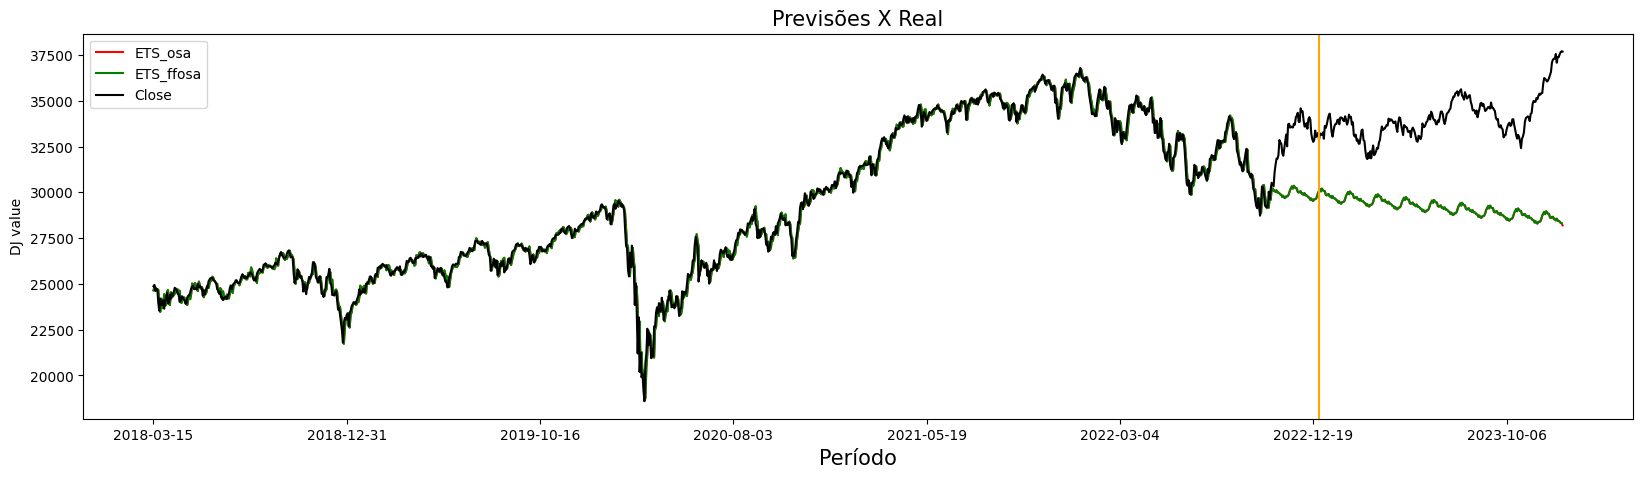

In [96]:
plt.figure(figsize=(20,5));
dataToPlot.iloc[50:, :].plot.line(figsize=(20,5), x='Date', y=['ETS_osa',	'ETS_ffosa', 'Close'],
                color=['red', 'green', 'black']);
plt.ylabel('DJ value');
plt.title('Previsões X Real',size=15);
plt.xlabel("Período", size=15);
plt.axvline(x=(pp.n-1), color='orange', linestyle='-', label='last training point');
# plt.legend(['Valor real','ARIMA']);

In [97]:
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
print('MAPE:', mean_absolute_percentage_error(pp.v_y, dataToPlot['ETS_osa'][pp.v_y.index], 
                                              symmetric=False))
print('SMAPE:', mean_absolute_percentage_error(pp.v_y, dataToPlot['ETS_osa'][pp.v_y.index], 
                                              symmetric=True))

MAPE: 0.1355703545212909
SMAPE: 0.14645409482135338


In [68]:
print('MAPE:', mean_absolute_percentage_error(pp.v_y, dataToPlot['ETS_ffosa'][pp.v_y.index], 
                                              symmetric=False))
print('SMAPE:', mean_absolute_percentage_error(pp.v_y, dataToPlot['ETS_ffosa'][pp.v_y.index], 
                                              symmetric=True))

ValueError: Input contains NaN.

In [16]:
# ets.resid().plot(kind='box');

In [17]:
print("pp.t_y['Close']", len(pp.t_y['Close']))
print("pp.v_y['Close']", len(pp.v_y['Close']))
# ets.append()

pp.t_y['Close'] 1207
pp.v_y['Close'] 302


In [19]:
print('pp.n_m:', pp.n_m)
print('pp.n:', pp.n)
print('pp.m:', pp.m)

pp.n_m: 1509
pp.n: 1207
pp.m: 302


In [20]:
#predicting the validation data ('one-step ahead' - osa -
# and 'far from one-step ahead' - ffosa)
forecasts_inSample = pd.Series(ets.predict_in_sample())#[:-1])
forecasts_outSample_ffosa = pd.Series(ets.predict(n_periods=len(pp.v_y)),
                                      index = pp.v_y.index)
forecasts_outSample_osa_on = pd.Series(index = pp.v_y.index)
# forecasts_outSample_osa_off = pd.Series(index = pp.v_y.index)
ets_on = ets
# ets_off = modeling.get_saved_model(pmdarima.arima.arima.ARIMA(order = (0,0,0)), 
#                                   label='(2, 1, 0)x(1, 1, 0, 30)') 
for t in range(len(pp.v_y)):
    index = pp.v_y.index[t]
    pred_osa_on = ets_on.predict(n_periods=1)[0]
    # pred_osa_off = ets_off.predict(n_periods=1).iloc[0]
    forecasts_outSample_osa_on[index] = pred_osa_on
    # forecasts_outSample_osa_off[index] = pred_osa_off
    u_t = pp.v_y.iloc[t,0]
    ets_on.update(u_t)
    # ets_off.add_new_observations(u_t)
    # ets_osa_off(u_t, refit=False)

# modeling.save_model(model=ets_on, 
#                     label='(2, 1, 0)x(1, 1, 0, 30)_on')    
forecasts_ffosa=pd.concat([forecasts_inSample, forecasts_outSample_ffosa])
# forecasts_osa_off=pd.concat([forecasts_inSample, forecasts_outSample_osa_off])
forecasts_osa_on=pd.concat([forecasts_inSample, forecasts_outSample_osa_on])

In [21]:
forecasts_inSample

0           0.000000
1       24467.967102
2       25323.893890
3       24998.692247
4       25345.938055
            ...     
1202    28885.504240
1203    29414.953085
1204    29138.509471
1205    30053.944715
1206    29585.156946
Length: 1207, dtype: float64

In [22]:
type(ets)

pmdarima.arima.arima.ARIMA

In [22]:
print('forecasts_inSample:', len(forecasts_inSample))
print('forecasts_osa_on:', len(forecasts_osa_on))
print('forecasts_ffosa:', len(forecasts_ffosa))
print('iops.tv_data:', len(iops.tv_data['Close']))

forecasts_inSample: 1207
forecasts_osa_on: 1509
forecasts_ffosa: 1509
iops.tv_data: 1509


In [23]:
dataToPlot = iops.tv_data[['Date', 'Close']]
dataToPlot['ARIMA_osa'] = forecasts_osa_on
dataToPlot['ARIMA_ffosa'] = forecasts_ffosa
display(dataToPlot)

C:\Users\praf6\AppData\Local\Temp\ipykernel_45424\4243114419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataToPlot['ARIMA_osa'] = forecasts_osa_on
C:\Users\praf6\AppData\Local\Temp\ipykernel_45424\4243114419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataToPlot['ARIMA_ffosa'] = forecasts_ffosa


,Date,Close,ARIMA_osa,ARIMA_ffosa
0,2018-01-02,24824.009766,0.000000,0.000000
1,2018-01-03,24922.679688,24467.967102,24467.967102
2,2018-01-04,25075.130859,25323.893890,25323.893890
3,2018-01-05,25295.869141,24998.692247,24998.692247
4,2018-01-08,25283.000000,25345.938055,25345.938055
...,...,...,...,...
1504,2023-12-22,37385.968750,37273.118973,20200.253404
1505,2023-12-26,37545.328125,37549.310249,19969.987366
1506,2023-12-27,37656.519531,37540.058964,20240.285577
1507,2023-12-28,37710.101562,37699.857630,20035.695428


In [32]:
dataToPlot.Date[pp.n-1]

'2022-10-17'

<Figure size 2000x500 with 0 Axes>

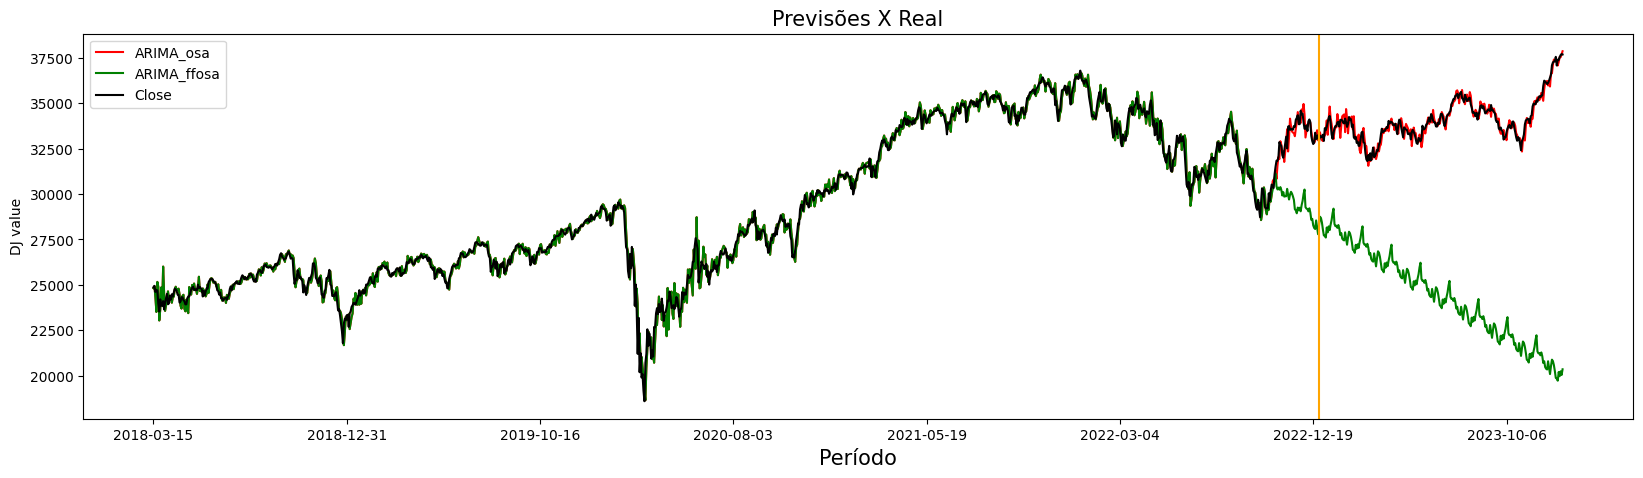

In [41]:

plt.figure(figsize=(20,5));
dataToPlot.iloc[50:, :].plot.line(figsize=(20,5), x='Date', y=['ARIMA_osa',	'ARIMA_ffosa', 'Close'],
                color=['red', 'green', 'black']);
plt.ylabel('DJ value');
plt.title('Previsões X Real',size=15);
plt.xlabel("Período", size=15);
plt.axvline(x=(pp.n-1), color='orange', linestyle='-', label='last training point');
# plt.legend(['Valor real','ARIMA']);

# Trend modeling ... to be continued

In [221]:
from sklearn.linear_model import LinearRegression
p1L = LinearRegression(fit_intercept=True)
p1L.fit(np.array(train.index).reshape((-1,1)), train['y'])
print('Trend model coefficient={} and intercept={}'.format(p1L.coef_[0],
    p1L.intercept_))

# p1L.coef_[0] = 1

Trend model coefficient=14.290705343901134 and intercept=30761.66209044122


In [1]:
33*33

1089

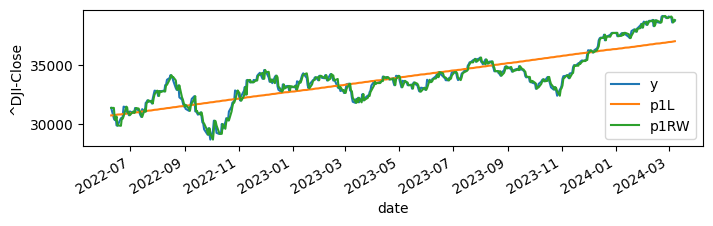

In [222]:
figsize = (8, 2);
train['p1L'] = p1L.predict(np.array(train.index).reshape((-1,1)))
train['p1RW'] = train['y'].shift(1)
train.loc[train.index[0], 'p1RW'] = train.loc[train.index[1], 'p1RW']
train.plot(x='date', y=['y', 'p1L', 'p1RW'], figsize=figsize, ylabel=ticker+'-Close');

## Trend model residuals modeling

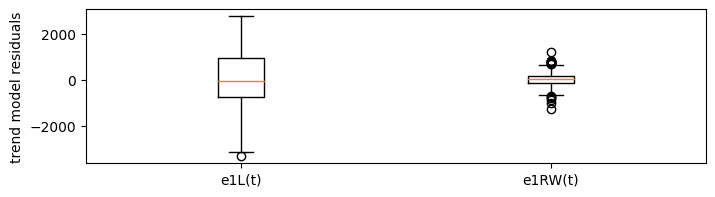

In [223]:
train['e1L(t)'] = train['y'].subtract(train['p1L'])
train['e1RW(t)'] = train['y'].subtract(train['p1RW'])
plt.figure(figsize=figsize);
plt.boxplot(train[['e1L(t)', 'e1RW(t)']].iloc[1:, :], 
            labels = ['e1L(t)', 'e1RW(t)'])
plt.ylabel('trend model residuals');

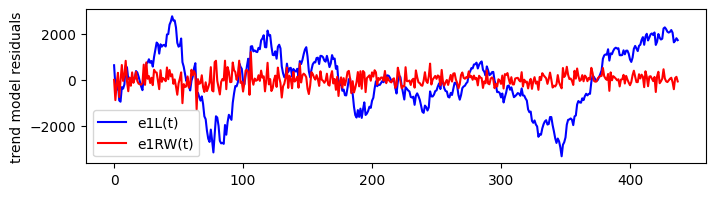

In [224]:
train[['e1L(t)', 'e1RW(t)']].plot(color=['b', 'r'], figsize=figsize, ylabel='trend model residuals');

In [225]:
nDj = train[['date', 'y', 'p1L', 'e1L(t)', 'p1RW', 'e1RW(t)']]
# nDj.columns = ['date', 'y', 'p1L', 'e1(t)']
nDj['e1RW(t-1)'] = nDj['e1RW(t)'].shift(1).values
nDj.head(5)

C:\Users\praf6\AppData\Local\Temp\ipykernel_14184\2009156683.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nDj['e1RW(t-1)'] = nDj['e1RW(t)'].shift(1).values


,date,y,p1L,e1L(t),p1RW,e1RW(t),e1RW(t-1)
0,2022-06-10,31392.789062,30761.662090,631.126972,31392.789062,0.000000,NaN
1,2022-06-13,30516.740234,30775.952796,-259.212561,31392.789062,-876.048828,0.000000
2,2022-06-14,30364.830078,30790.243501,-425.413423,30516.740234,-151.910156,-876.048828
3,2022-06-15,30668.529297,30804.534206,-136.004910,30364.830078,303.699219,-151.910156
4,2022-06-16,29927.070312,30818.824912,-891.754599,30668.529297,-741.458984,303.699219


>> correlation matrix:
            e1RW(t-1)   e1RW(t)
e1RW(t-1)   1.000000 -0.004839
e1RW(t)    -0.004839  1.000000


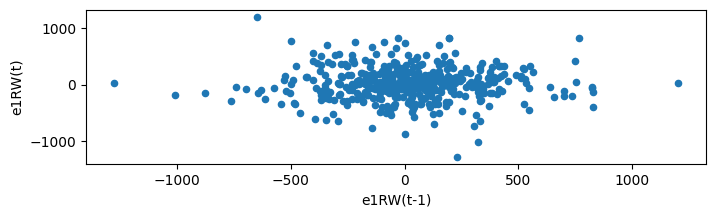

In [226]:
nDj.plot(x='e1RW(t-1)', y='e1RW(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', nDj[['e1RW(t-1)', 'e1RW(t)']].corr(method='pearson'))

C:\Users\praf6\AppData\Local\Temp\ipykernel_14184\625584015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nDj['e1L(t-1)'] = nDj['e1L(t)'].shift(1)


>> correlation matrix:
           e1L(t-1)    e1L(t)
e1L(t-1)  1.000000  0.971386
e1L(t)    0.971386  1.000000


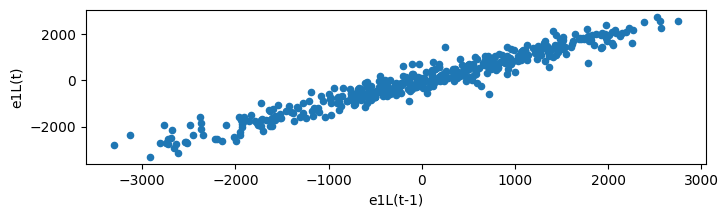

In [227]:
nDj['e1L(t-1)'] = nDj['e1L(t)'].shift(1)
nDj.plot(x='e1L(t-1)', y='e1L(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', nDj[['e1L(t-1)', 'e1L(t)']].corr(method='pearson'))

### Autocorrelation

--> ac(1)= -0.00483945976502578
--> ac(2)= -0.03632353973959035


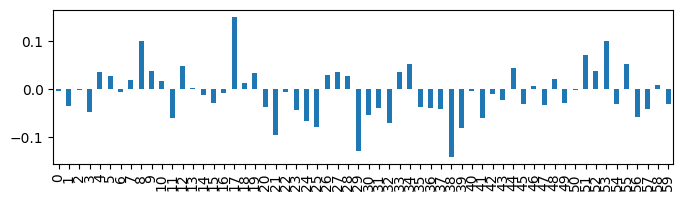

In [228]:
acs = []
for t in range(1, 61):#41
    acs.append(nDj['e1RW(t)'].autocorr(t, ))
    if t < 3:
        print('--> ac('+str(t)+')= '+str(acs[t-1]))
pd.Series(acs).plot(kind='bar', figsize=figsize);

The traditional autocorrelation in a lag may be contamiated by intermediate lags. So a different function is needed. Such a function may be defined as the correlation between $X_t$
and $X_{t-k}$ after removing the effect of the intervening variables $X_{t-1}, \dots, X_{t-k + 1}$. This coefficient is called the *partial autocorrelation* at lag $k$ and will be denoted
by $\phi_{kk}$. If $X_t$ is a normally distributed variable, we can let:

$\phi_{kk} = Corr(X_t, X_{t-k}|X_{t-1}, \dots, X_{t-k+1})$

An alternative approach, not based on normality, can be developed in the following
way. Consider predicting $X_t$ based on a linear function of the intervening variables 

$\hat{X}_t = f(X_{t-1},\dots, X_{t-k + 1})$ = $\sum_{i=1}^{k-1}\beta_i X_{t-i}$, 

with the $\beta$’s chosen to
minimize the mean square error of prediction. If we assume that the $\beta$’s have been so
chosen and then think backward in time, **it follows from stationarity** that the best “predictor” of $X_{t − k}$ based on the same $X_{t − 1},\dots, X_{t − k + 1}$ will be 


$\hat{X}_{t-k} = \sum_{i=1}^{k-1}\beta_i X_{t-k+i}$. 

Ex. (Studyng the lag) $k=3$: 

$\hat{X}_t = f(X_{t-1}, X_{t-2})$ = $\beta_1 X_{t-1} + \beta_2 X_{t-2}$

$\hat{X}_{t-3} = f(X_{t-1}, X_{t-2})$ = 
$\beta_1 X_{t-3+1} + \beta_2 X_{t-3+2}$
= $\beta_1 X_{t-2} + \beta_2 X_{t-1}$.


Then, considering the error $\varepsilon_t = X_t - \hat{X}_t$, the partial autocorrelation function at lag $k$ is then
defined to be the correlation between the prediction errors; that is, $\rho_{kk} = Corr(\varepsilon_t, \varepsilon_{t-k})$ 

For normally distributed series, it can be shown that the two definitions coincide. By
convention, we take $\rho_{11} = 1$.

<!--Autoregressive (AR) models capture this dependency as a (non)linear
regression between the $x_{t+k}$ and $x_t$. However, time series tend to carry information and
dependency structures in steps and therefore autocorrelation at lag $k$ is also influenced by
the intermediate variables $x_t, x_{t+1}…x_{t+k-1}$. Therefore, autocorrelation is not the
correct measure of the mutual correlation between $x_t$ and $x_{t+k}$ in the presence of the
intermediate variables. Hence, it would erroneous to choose $k$ in AR models based on
autocorrelation. _Partial autocorrelation solves this problem_ by measuring the correlation
between $x_t$ and $x_{t+k}$ when the influence of the intermediate variables has been removed.
Hence partial autocorrelation in time series analysis defines the correlation between $x_t$ and $x_{t+k}$ which is not accounted for by lags $t+1$ to $t+k-1$.

the plot_acf function of
statsmodels.graphics.tsaplots compute and plot the autocorrelation at various
lags. Additionally, this function also plots the 95% confidence intervals. Autocorrelation
outside these confidence intervals is statistically significant correlation while those which
are inside the confidence intervals are due to random noise.

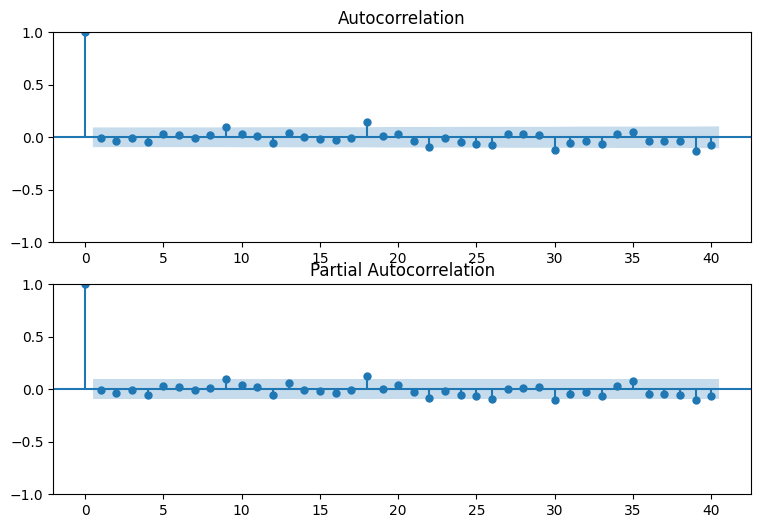

In [229]:
#%pip install statsmodels
import statsmodels
import statsmodels.api as sm
#from statsmodels.tsa.stattools import coint, adfuller
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(nDj['e1RW(t)'][1:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(nDj['e1RW(t)'][1:], lags=40, ax=ax2)

significantLags: [9, 18, 26, 30, 39]


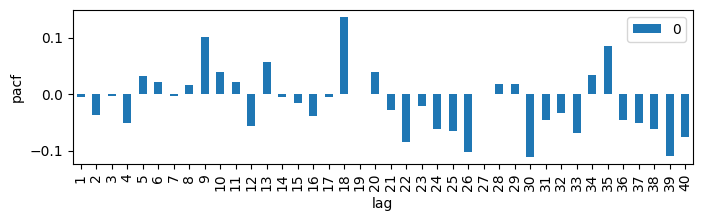

In [230]:
# acf, ci = sm.tsa.acf(endog, alpha=0.05)
def getSignificantLags(y, nLags = 5, alpha=0.05):
    pac, pac_ci = sm.tsa.pacf(x=y, nlags=nLags, alpha=alpha)
    pd.DataFrame(pac)[1:].plot(kind='bar', figsize=figsize, legend='pacf',
                               xlabel='lag', ylabel='pacf');
    significantLags = []
    for i in range(1, len(pac)):
        # print(pac[i], pac_ci[i][0], pac_ci[i][1])
        if pac[i] < pac_ci[i][0] - pac[i] or pac[i] > pac_ci[i][1] - pac[i]:
            significantLags.append(i)
    print('significantLags:', significantLags)
    return significantLags
e1_significantLags = getSignificantLags(y=nDj['e1RW(t)'][1:], nLags = 40, alpha=0.05)

Let $e_t$ be the instance of $\varepsilon_t$ in the case of random walk model residuals. 

Thus, one can have $e_t$ as a function of $e_{t-9}, e_{t-18}, e_{t-26}, e_{t-30}, e_{t-39}$: 

$e_t = f(e_{t-9}, e_{t-18}, e_{t-26}, e_{t-30}, e_{t-39})$. 

In this way, the multivariate models studied during the classes of Computational Statistics can take place.

## Regression

Reference: [Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media. 2019](https://universidadefe957-my.sharepoint.com/:b:/g/personal/paulo_firmino_ufca_edx_br/Ec_UL4nCLQRGnFpftnOkv5ABrePEllnHLR7rrqPreAvn6A?e=RFGcMB)

### Preprocessing

#### Feature Engineering

##### Lags

In [231]:
def appendLagVariables(yNm, significantLags, df, dropna=True, previousData = None):
    prefix = yNm.replace(')', '')
    df = df.copy()
    lowerIndex = 0
    x = df[yNm]
    if previousData is not None:
        x = pd.concat([previousData[yNm], x])
        lowerIndex = previousData.shape[0]
    for lag in significantLags:
        varNm = prefix+'-'+str(lag)+')'
        df[varNm] = x.shift(lag)[lowerIndex:]    
    if dropna:
        df.dropna(axis=0, inplace=True)
        
    display(df.head(2))
    return df
nDj.drop(['e1L(t-1)', 'e1RW(t-1)'], axis=1, inplace=True)
nDj = appendLagVariables(yNm='e1RW(t)', 
                         significantLags = e1_significantLags, 
                         df = nDj, 
                         dropna=True)

C:\Users\praf6\AppData\Local\Temp\ipykernel_14184\2024106850.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nDj.drop(['e1L(t-1)', 'e1RW(t-1)'], axis=1, inplace=True)


,date,y,p1L,e1L(t),p1RW,e1RW(t),e1RW(t-9),e1RW(t-18),e1RW(t-26),e1RW(t-30),e1RW(t-39)
39,2022-08-08,32832.539062,31318.999599,1513.539464,32803.468750,29.070312,-228.500000,-208.541016,-253.880859,823.320312,0.000000
40,2022-08-09,32774.410156,31333.290304,1441.119852,32832.539062,-58.128906,436.050781,-142.619141,321.830078,-62.419922,-876.048828


##### Linear modeling of the trend-time model residuals

In [232]:
y2Nm ='e1RW(t)'
x2Nms = [vNm for vNm in nDj.columns if 'e1RW(t-' in vNm]
y2Train = nDj[[y2Nm]]
x2Train = nDj[x2Nms]
display(y2Train[:3])
display(x2Train.iloc[:3,:])

,e1RW(t)
39,29.070312
40,-58.128906
41,535.101562


,e1RW(t-9),e1RW(t-18),e1RW(t-26),e1RW(t-30),e1RW(t-39)
39,-228.500000,-208.541016,-253.880859,823.320312,0.000000
40,436.050781,-142.619141,321.830078,-62.419922,-876.048828
41,332.041016,658.089844,-129.439453,-491.269531,-151.910156


In [233]:
from sklearn.linear_model import LinearRegression
p2 = LinearRegression() 
p2.fit(x2Train, y2Train)

LinearRegression()

In [234]:
# xTrain.columns.tolist()
# p2.coef_.tolist()[0]

,feature,coefficient,|coefficient|
1,e1RW(t-18),0.151396,0.151396
3,e1RW(t-30),-0.115914,0.115914
4,e1RW(t-39),-0.108763,0.108763
2,e1RW(t-26),-0.086200,0.086200
0,e1RW(t-9),0.051107,0.051107


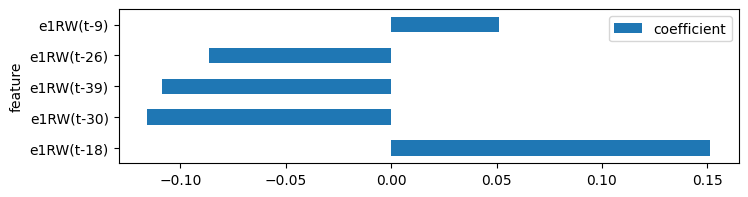

In [235]:
lin_regCoefsDf = pd.DataFrame({'feature':(x2Train.columns.tolist()), 
               'coefficient':p2.coef_.tolist()[0],
               '|coefficient|':np.abs(p2.coef_).tolist()[0]}).\
                   sort_values(by=['|coefficient|'], ascending=False)   
lin_regCoefsDf.plot(x='feature', y='coefficient', kind = 'barh', figsize=figsize);
display(lin_regCoefsDf)

In [236]:
nDj.columns

Index(['date', 'y', 'p1L', 'e1L(t)', 'p1RW', 'e1RW(t)', 'e1RW(t-9)',
       'e1RW(t-18)', 'e1RW(t-26)', 'e1RW(t-30)', 'e1RW(t-39)'],
      dtype='object')

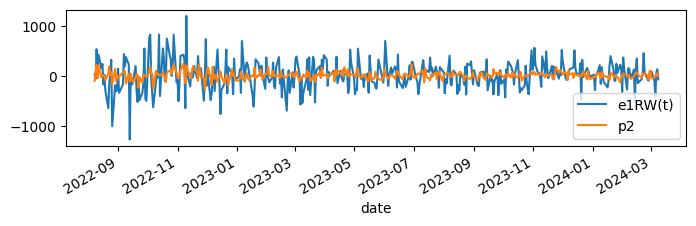

In [237]:
# figsize = (8, 2);
nDj['p2'] = p2.predict(X=x2Train)
nDj.plot(x = 'date', y=['e1RW(t)', 'p2'], figsize=figsize);

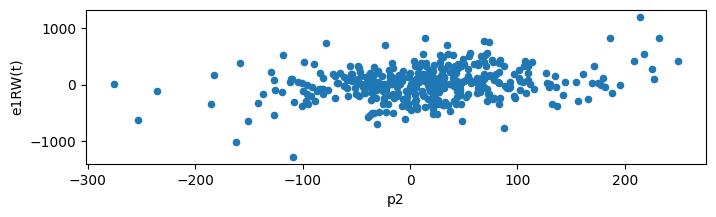

In [238]:
nDj.plot(x = 'p2', y='e1RW(t)', figsize=figsize, kind='scatter');

###### More boosting

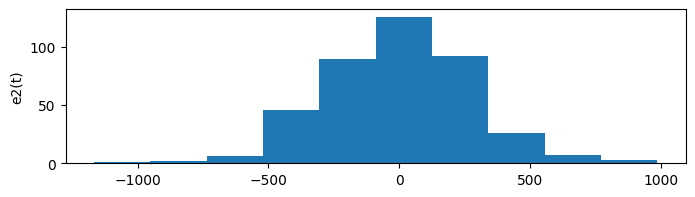

In [239]:
nDj['e2(t)'] = nDj['e1RW(t)'].subtract(nDj['p2'])
nDj['e2(t)'].plot(kind='hist', figsize=figsize, 
                         ylabel = 'e2(t)');

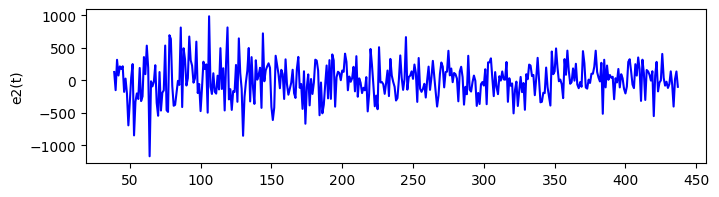

In [240]:
nDj['e2(t)'].plot(color='b', figsize=figsize, ylabel='e2(t)');

significantLags: [36]


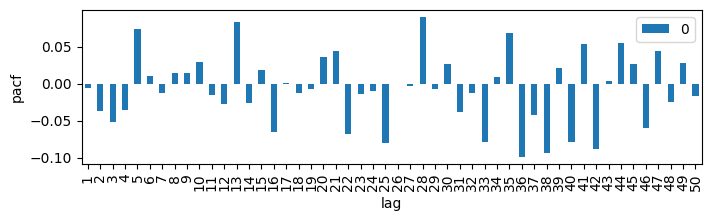

In [241]:
e2_significantLags = getSignificantLags(y=nDj['e2(t)'], nLags = 50, alpha=0.05)

In [242]:
nDj = appendLagVariables(yNm='e2(t)', 
                         significantLags = e2_significantLags, 
                         df = nDj, 
                         dropna=True)

,date,y,p1L,e1L(t),p1RW,e1RW(t),e1RW(t-9),e1RW(t-18),e1RW(t-26),e1RW(t-30),e1RW(t-39),p2,e2(t),e2(t-36)
75,2022-09-28,29683.740234,31833.464991,-2149.724757,29134.990234,548.750000,-173.269531,145.990234,-643.128906,239.570312,416.330078,11.99892,536.751080,129.505419
76,2022-09-29,29225.609375,31847.755697,-2622.146322,29683.740234,-458.130859,-139.400391,-337.980469,-154.019531,-171.691406,-85.679688,0.56855,-458.699409,-149.962215


In [243]:
y3Nm ='e2(t)'
x3Nms = [vNm for vNm in nDj.columns if 'e2(t-' in vNm]
y3Train = nDj[[y3Nm]]
x3Train = nDj[x3Nms]
display(y3Train[:3])
display(x3Train.iloc[:3,:])

,e2(t)
75,536.751080
76,-458.699409
77,-484.686053


,e2(t-36)
75,129.505419
76,-149.962215
77,317.510014


In [244]:
p3 = LinearRegression() 
p3.fit(x3Train, y3Train)

LinearRegression()

,feature,coefficient,|coefficient|
0,e2(t-36),-0.089769,0.089769


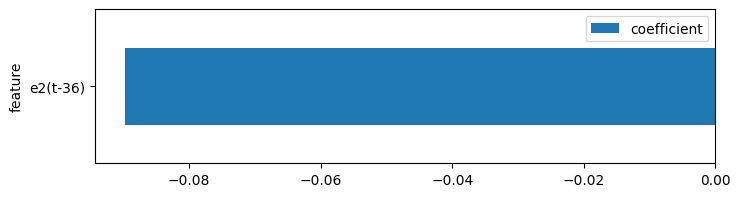

In [245]:
p3CoefsDf = pd.DataFrame({'feature':(x3Train.columns.tolist()), 
               'coefficient':p3.coef_.tolist()[0],
               '|coefficient|':np.abs(p3.coef_).tolist()[0]}).\
                   sort_values(by=['|coefficient|'], ascending=False)   
p3CoefsDf.plot(x='feature', y='coefficient', kind = 'barh', figsize=figsize);
display(p3CoefsDf)

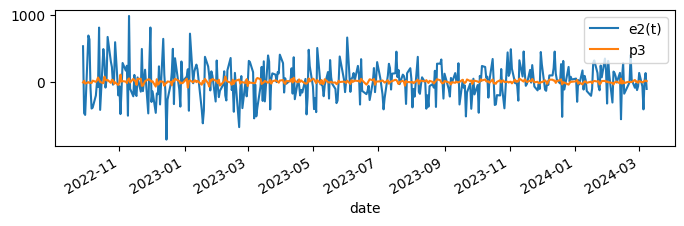

In [246]:
nDj['p3'] = p3.predict(X=x3Train)
nDj.plot(x = 'date', y=['e2(t)', 'p3'], figsize=figsize);

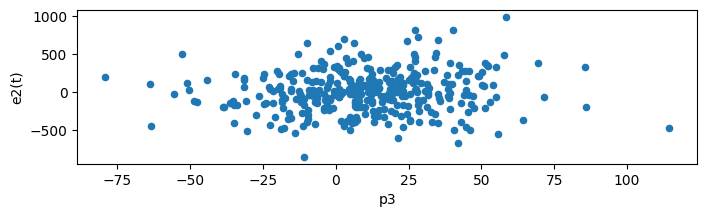

In [247]:
nDj.plot(x = 'p3', y='e2(t)', figsize=figsize, kind='scatter');

###### Trying a XGBoost

In [248]:
# %pip install xgboost
import xgboost as xg
p3_xgb = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 3, 
                            seed = 0, max_depth = x3Train.shape[1])
p3_xgb.fit(x3Train, y3Train)
# x_train_predictions = [round(x_hat) for x_hat in xgb_reg.predict(x_train)]


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=3, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

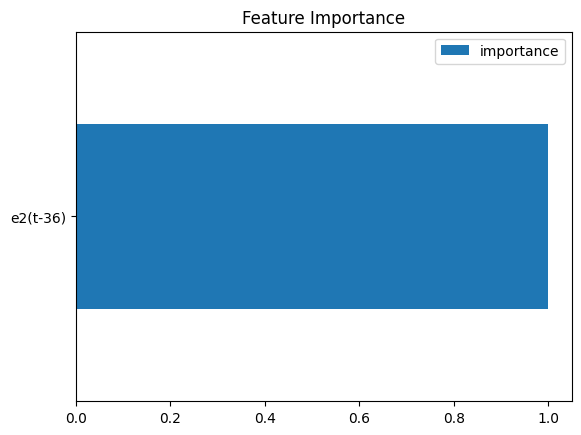

In [249]:
fi = pd.DataFrame(data=p3_xgb.feature_importances_,
             index=x3Nms, #xgb_reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

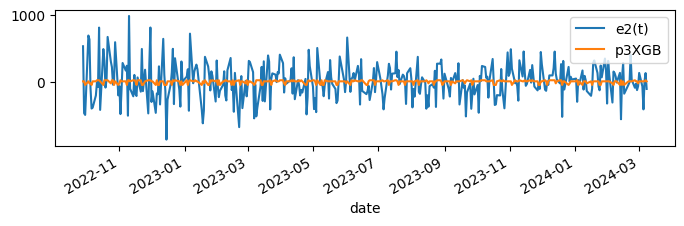

In [250]:
nDj['p3XGB'] = [round(x_hat) for x_hat in p3_xgb.predict(x3Train)]
nDj.plot(x = 'date', y=['e2(t)', 'p3XGB'], figsize=figsize);

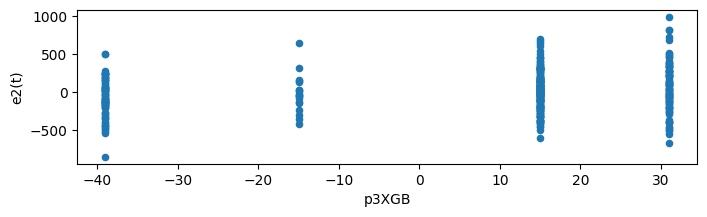

In [251]:
nDj.plot(x = 'p3XGB', y='e2(t)', figsize=figsize, kind='scatter');

#### Summing the boosting models

In [252]:
predModelsNms = [nm for nm in nDj.columns if 'p' in nm]
predModelsNms

['p1L', 'p1RW', 'p2', 'p3', 'p3XGB']

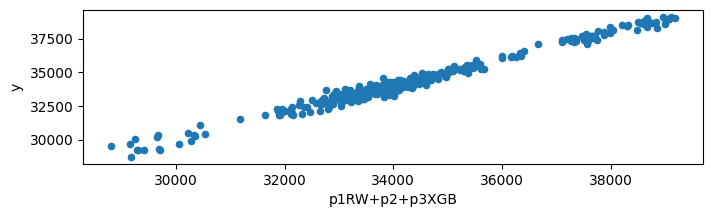

In [253]:
nDj['p1RW+p2'] = nDj['p1RW'].add(nDj['p2'])
nDj['p1RW+p2+p3XGB'] = nDj['p1RW+p2'].add(nDj['p3XGB'])
nDj.plot(x = 'p1RW+p2+p3XGB', y='y', figsize=figsize, kind='scatter');

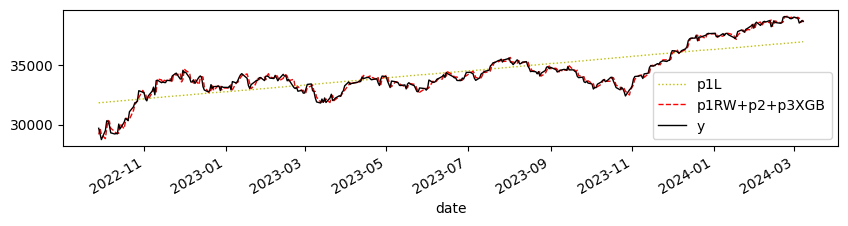

In [254]:
nDj.plot(x = 'date', y=['p1L', 'p1RW+p2+p3XGB', 'y'], 
         figsize=(10, 2), 
         style=[':','--','-'],
         color=['y','red','black'],
         linewidth=1
         );

## Forecasting the test data

In [255]:
nDj.columns

Index(['date', 'y', 'p1L', 'e1L(t)', 'p1RW', 'e1RW(t)', 'e1RW(t-9)',
       'e1RW(t-18)', 'e1RW(t-26)', 'e1RW(t-30)', 'e1RW(t-39)', 'p2', 'e2(t)',
       'e2(t-36)', 'p3', 'p3XGB', 'p1RW+p2', 'p1RW+p2+p3XGB'],
      dtype='object')

In [262]:
x2Test.loc[x2Test.iloc[:,0].isnull(), :]

,e1RW(t-9),e1RW(t-18),e1RW(t-26),e1RW(t-30),e1RW(t-39)
447,NaN,-96.820312,151.519531,48.96875,60.300781


In [263]:
#linear trend model
test['p1L'] = p1L.predict(np.array(test.index).reshape((-1,1)))
test.rename(columns={'Date': 'date', "Close": "y"}, inplace = True)
#linear trend model residuals model, level # 1
test['e1L(t)'] = test['y'].subtract(test['p1L'])
test['p1RW'] = test['y'].shift(1)
# test.loc[0, 'p1RW'] = nDj.loc[nDj.shape[0]-1, 'y']
test.fillna(method='backfill', inplace=True);
test['e1RW(t)'] = test['y'].subtract(test['p1RW'])
print("*"*6, 'appendLagVariables: e1RW', "*"*6)
test = appendLagVariables(yNm='e1RW(t)', 
                         significantLags = e1_significantLags, 
                         df = test, 
                         dropna=False, previousData = nDj)
y2Test = test[[y2Nm]]
x2Test = test[x2Nms]
# x2Test.fillna(method='backfill');

test['p2'] = p2.predict(X=x2Test)
#linear trend model residuals model, level # 2
test['e2(t)'] = test['e1RW(t)'].subtract(test['p2'])
print("*"*6, 'appendLagVariables: e2', "*"*6)
test = appendLagVariables(yNm='e2(t)', 
                         significantLags = e2_significantLags, 
                         df = test, 
                         dropna=False, previousData = nDj)
# train.fillna(method='backfill')
# test.fillna(method='backfill');
y3Test = test[[y3Nm]]
x3Test = test[x3Nms]
# x3Test.fillna(method='backfill');
test['p3'] = p3.predict(X=x3Test)
test['p3XGB'] = [round(x_hat) for x_hat in p3_xgb.predict(x3Test)]
#boosting aggregator
test['p1RW+p2'] = test['p1RW'].add(test['p2'])
test['p1RW+p2+p3XGB'] = test['p1RW+p2'].add(test['p3XGB'])


fullData = pd.concat([nDj, test], axis = 0)
print("*"*6, 'fullData', "*"*6)
fullData.tail()


****** appendLagVariables: e1RW ******


,date,Open,High,Low,y,Adj Close,Volume,p1L,e1L(t),p1RW,e1RW(t),e1RW(t-9),e1RW(t-18),e1RW(t-26),e1RW(t-30),e1RW(t-39)
438,2024-03-11,38667.210938,38794.761719,38483.250000,38769.660156,38769.660156,300190000,37020.991031,1748.669125,38769.660156,0.000000,-96.820312,-524.628906,369.539062,60.300781,-118.039062
439,2024-03-12,38883.320312,39071.558594,38711.390625,39005.488281,39005.488281,329090000,37035.281736,1970.206545,38769.660156,235.828125,-23.390625,151.519531,134.582031,224.019531,-231.859375


****** appendLagVariables: e2 ******


,date,Open,High,Low,y,Adj Close,Volume,p1L,e1L(t),p1RW,e1RW(t),e1RW(t-9),e1RW(t-18),e1RW(t-26),e1RW(t-30),e1RW(t-39),p2,e2(t),e2(t-36)
438,2024-03-11,38667.210938,38794.761719,38483.250000,38769.660156,38769.660156,300190000,37020.991031,1748.669125,38769.660156,0.000000,-96.820312,-524.628906,369.539062,60.300781,-118.039062,-94.015574,94.015574,285.756971
439,2024-03-12,38883.320312,39071.558594,38711.390625,39005.488281,39005.488281,329090000,37035.281736,1970.206545,38769.660156,235.828125,-23.390625,151.519531,134.582031,224.019531,-231.859375,25.758695,210.069430,326.160752


****** fullData ******


,date,y,p1L,e1L(t),p1RW,e1RW(t),e1RW(t-9),e1RW(t-18),e1RW(t-26),e1RW(t-30),...,e2(t-36),p3,p3XGB,p1RW+p2,p1RW+p2+p3XGB,Open,High,Low,Adj Close,Volume
542,2024-08-08,39446.488281,38507.224387,939.263894,38763.449219,683.039062,654.269531,210.820312,162.332031,15.640625,...,263.691250,-14.128198,-39,38833.192640,38794.192640,38940.378906,39508.398438,38922.789062,39446.488281,376440000.0
543,2024-08-09,39497.539062,38521.515092,976.023970,39446.488281,51.050781,-49.410156,742.761719,-23.851562,36.257812,...,125.991886,-1.767024,15,39577.713875,39592.713875,39408.058594,39628.660156,39230.429688,39497.539062,316320000.0
544,2024-08-12,39357.011719,38535.805798,821.205921,39497.539062,-140.527344,203.398438,243.597656,67.871094,-45.199219,...,363.266298,-23.066980,-39,39566.869340,39527.869340,39556.011719,39587.058594,39251.718750,39357.011719,312380000.0
545,2024-08-13,39765.640625,38550.096503,1215.544122,39357.011719,408.628906,99.460938,-533.058594,-31.082031,50.660156,...,-6.932546,10.165507,15,39274.014103,39289.014103,39445.269531,39792.800781,39392.410156,39765.640625,365560000.0
546,2024-08-14,40008.390625,38564.387208,1444.003417,39765.640625,242.750000,-494.820312,-377.488281,-52.820312,162.332031,...,359.106383,-22.693547,-39,39679.130223,39640.130223,39800.589844,40068.750000,39737.199219,40008.390625,317800000.0


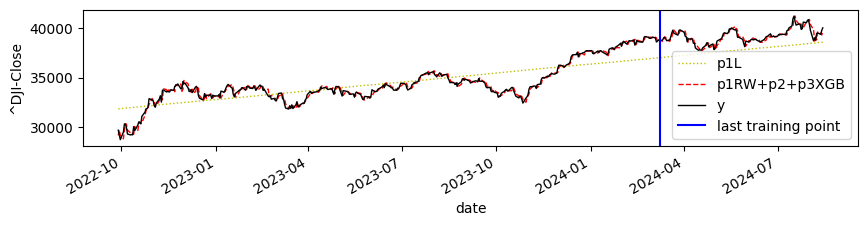

In [267]:
import matplotlib.pyplot as plt
fullData.plot(x = 'date', y=['p1L', 'p1RW+p2+p3XGB', 'y'], ylabel=(ticker+'-Close'),
         figsize=(10, 2), 
         style=[':','--','-'],
         color=['y','r','black'],
         linewidth=1
         );
plt.axvline(x=pd.to_datetime(train.date[train.shape[0]-1]), color='b', linestyle='-', label='last training point')
plt.legend()
plt.show()

### Forecasting Performance

In [266]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
def TheilU(x_true, x_pred):
    fResiduals2 = x_true[1:].subtract(x_pred[1:])
    fResiduals2 = fResiduals2.multiply(fResiduals2)
    rwForecasts = x_true.shift(1)
    rwResiduals2 = x_true[1:].subtract(rwForecasts[1:])
    rwResiduals2 = rwResiduals2.multiply(rwResiduals2)
    theil = fResiduals2.sum()/rwResiduals2.sum()
    return theil
def computeForecastingPerformance(train, test, modelNms):
    """compute the forecasting performance of the predictors.

    Parameters:
    train (DataFrame): The train data frame with the target time series and respective 
    forecasts.
    test (DataFrame): The test data frame with the target time series and respective 
    forecasts.
    modelNms (string): The names of the predictor columns. 

    Returns:
    peformance (DataFrame): The perfomance in train and test sets, in terms of 
    MAE, MAPE, R2, and TheilU.
    """
    MAE_train = []; MAPE_train = []; R2_train = []; Theil_train = []
    MAE_test = []; MAPE_test = []; R2_test = []; Theil_test = []
    train.dropna(inplace=True)
    target_train = train['y']
    target_test = test['y']
   
    for modelNm in modelNms:
        forecasts_train = train[modelNm]
        forecasts_test = test[modelNm]
        
        MAE_train.append(mean_absolute_error(x_true = target_train, x_pred= forecasts_train))
        MAPE_train.append(mean_absolute_percentage_error(x_true = target_train, x_pred= forecasts_train))
        R2_train.append(r2_score(x_true = target_train, x_pred= forecasts_train))
        Theil_train.append(TheilU(x_true = target_train, x_pred= forecasts_train))

        MAE_test.append(mean_absolute_error(x_true = target_test, x_pred= forecasts_test))
        MAPE_test.append(mean_absolute_percentage_error(x_true = target_test, x_pred= forecasts_test))
        R2_test.append(r2_score(x_true = target_test, x_pred= forecasts_test))
        Theil_test.append(TheilU(x_true = target_test, x_pred= forecasts_test))

    rDf = pd.DataFrame({'model': modelNms, 
                       'MAE_tr': MAE_train, 
                       'MAE_te': MAE_test, 
                       'MAPE_tr': MAPE_train,
                       'MAPE_te':MAPE_test,
                       'R2_tr': R2_train,
                       'R2_te':R2_test,
                       'Theil_tr': Theil_train,
                       'Theil_te':Theil_test
                       })
    print(" *********** Rank via train set-based Accuracy and RMSE-based Cross-validation *********** ") 
    display(rDf.sort_values(by="Theil_te", ascending = True))
        
computeForecastingPerformance(train=nDj, test = test, 
                              modelNms = ['p1L', 'p1RW', 'p1RW+p2', 'p1RW+p2+p3XGB'])    

 *********** Rank via train set-based Accuracy and RMSE-based Cross-validation *********** 


,model,MAE_tr,MAE_te,MAPE_tr,MAPE_te,R2_tr,R2_te,Theil_tr,Theil_te
1,p1RW,209.243925,218.564113,0.006204,0.005569,0.982123,0.846662,1.000000,1.000000
2,p1RW+p2,207.810564,228.660643,0.006149,0.005831,0.983176,0.834598,0.940896,1.077731
3,p1RW+p2+p3XGB,205.645046,228.556330,0.006086,0.005829,0.983603,0.833762,0.917318,1.082242
0,p1L,1019.717879,1387.444230,0.029845,0.035169,0.640863,-3.192311,20.140419,27.014347
